In [1]:
from data_pipeline import load_data, load_synthetic
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from clustering import *

In [2]:
root_gene = 'CRP'
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, _ = load_data(root_gene=root_gene,
                            minimum_evidence=minimum_evidence,
                            max_depth=max_depth)

synthetic_name = 'EColi_n{}_r{}_e{}_d{}'.format(len(gene_symbols), root_gene, minimum_evidence, max_depth)
s_expr, s_gs = load_synthetic(synthetic_name)

assert (np.array(gene_symbols) == np.array(s_gs)).all()

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
Selecting 1076 genes ...


# Intensity histograms

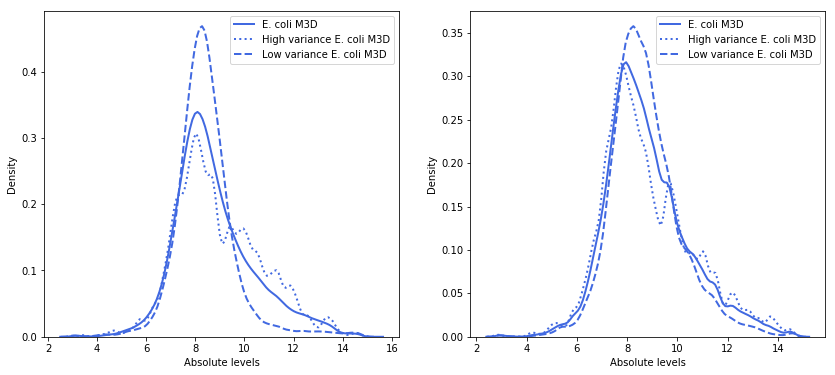

In [3]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_intensities(r_expr)
plt.subplot(122)
plot_intensities(s_expr)

# Gene ranges histograms

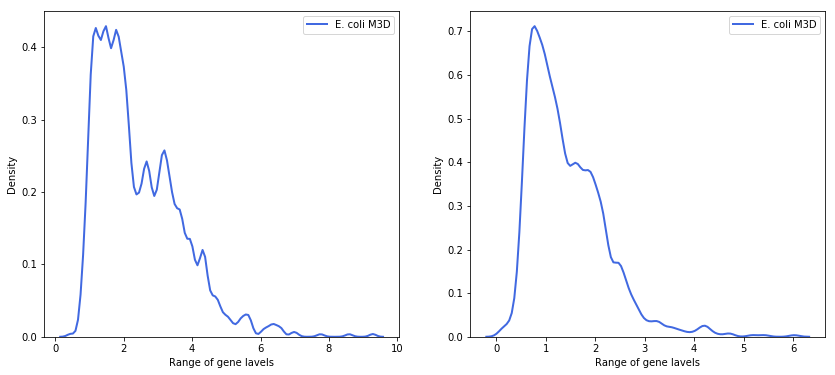

In [4]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_gene_ranges(r_expr)
plt.subplot(122)
plot_gene_ranges(s_expr)

# TF-TG histogram

In [5]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(r_expr, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr, gene_symbols)
r_back_corr = correlations_list(r_expr, r_expr)
s_back_corr = correlations_list(s_expr, s_expr)

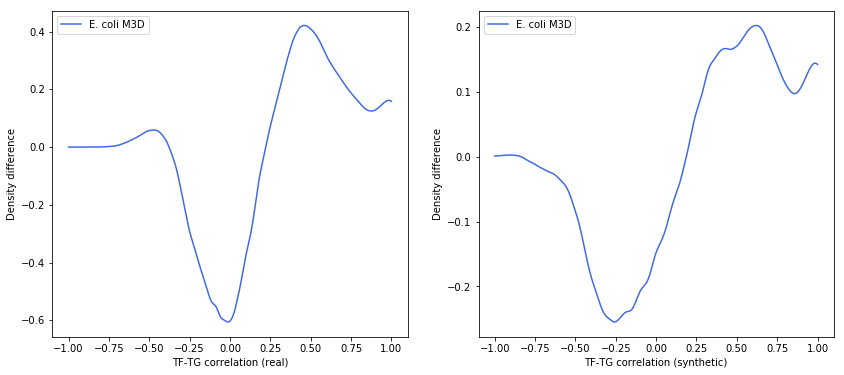

In [6]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation (real)')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation (synthetic)')  # Try s_back_corr

# TG-TG histogram

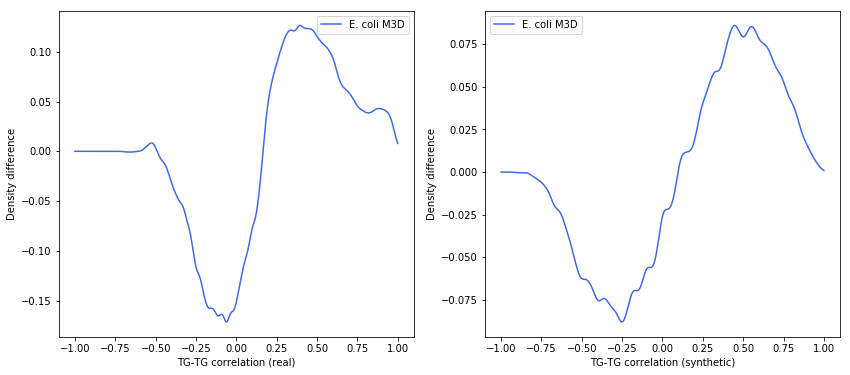

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation (real)')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation (synthetic)')  # Try s_back_corr

# E. coli TF activity histogram

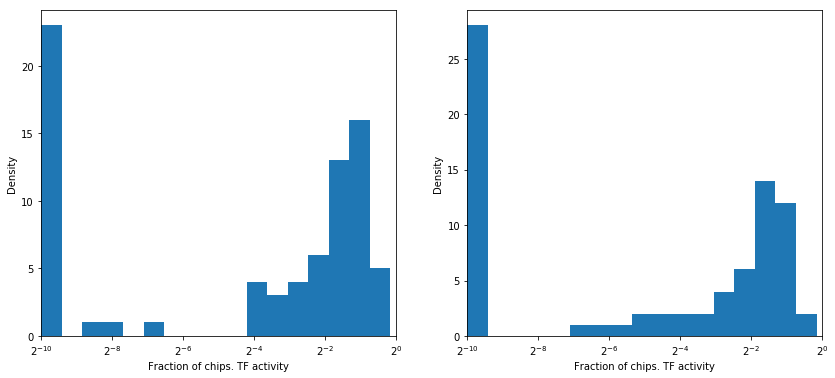

In [8]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_tf_activity_histogram(r_expr, gene_symbols)
plt.subplot(122)
plot_tf_activity_histogram(s_expr, gene_symbols)

# Cophenetic coefficients

In [9]:
print('Cophenetic coefficients')
ry = 1 - correlations_list(r_expr, r_expr)
sy = 1 - correlations_list(s_expr, s_expr)
rl_matrix = hierarchical_clustering(r_expr)
sl_matrix = hierarchical_clustering(s_expr)

rdist = 1 - upper_diag_list(pearson_correlation(r_expr, r_expr))
sdist = 1 - upper_diag_list(pearson_correlation(s_expr, s_expr))
c = pearson_correlation(rdist, sdist)
print('Cophenetic coefficient between real and synthetic distance matrices: {}'.format(c))

c, d = cophenet(rl_matrix, ry)
print('Cophenetic coefficient real dendrogram wrt. the original distance matrix: {}'.format(c))
c, d = cophenet(sl_matrix, sy)
print('Cophenetic coefficient synthetic dendrogram wrt. the synthetic distance matrix: {}'.format(c))
c = compare_cophenetic(rl_matrix, sl_matrix)
print('Cophenetic coefficient between real and synthetic dendrograms: {}'.format(c))

Cophenetic coefficients
Cophenetic coefficient between real and synthetic distance matrices: 0.6298478826006845
Cophenetic coefficient real dendrogram wrt. the original distance matrix: 0.5113830602702356
Cophenetic coefficient synthetic dendrogram wrt. the synthetic distance matrix: 0.42271713460807947
Cophenetic coefficient between real and synthetic dendrograms: 0.26445480879815153
